In [2]:
log_files = ['straight_drive.csv', 'turning.csv']

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [19]:
df = pd.read_csv('straight_drive.csv')

dx = np.diff(df['x'], prepend=df['x'][0])
dy = np.diff(df['y'], prepend=df['y'][0])

distances = np.sqrt(dx**2 + dy**2)
cumulative_distance = np.cumsum(distances)
start_time = df['timestamp'][0]
df['time_ms'] = (df['timestamp'] - start_time) * 1000

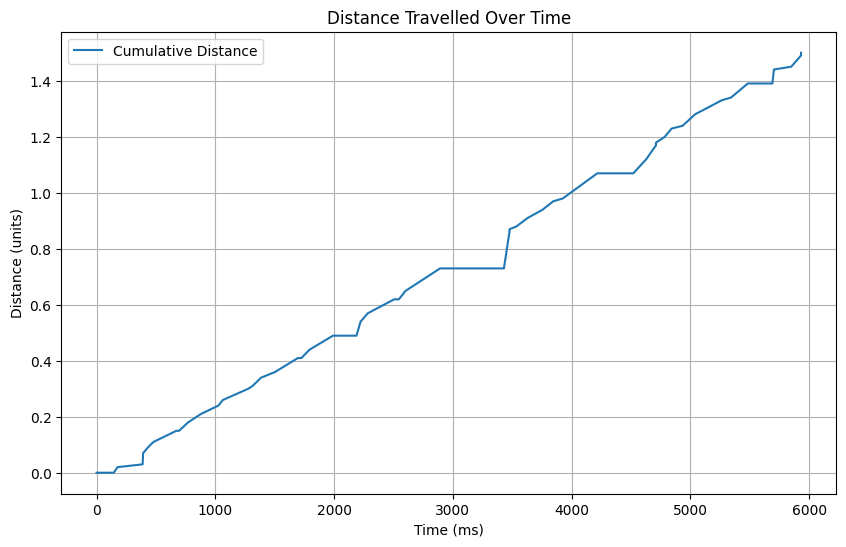

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['time_ms'], cumulative_distance, label='Cumulative Distance')
plt.xlabel('Time (ms)')
plt.ylabel('Distance (units)')
plt.title('Distance Travelled Over Time')
plt.legend()
plt.grid(True)
plt.show()

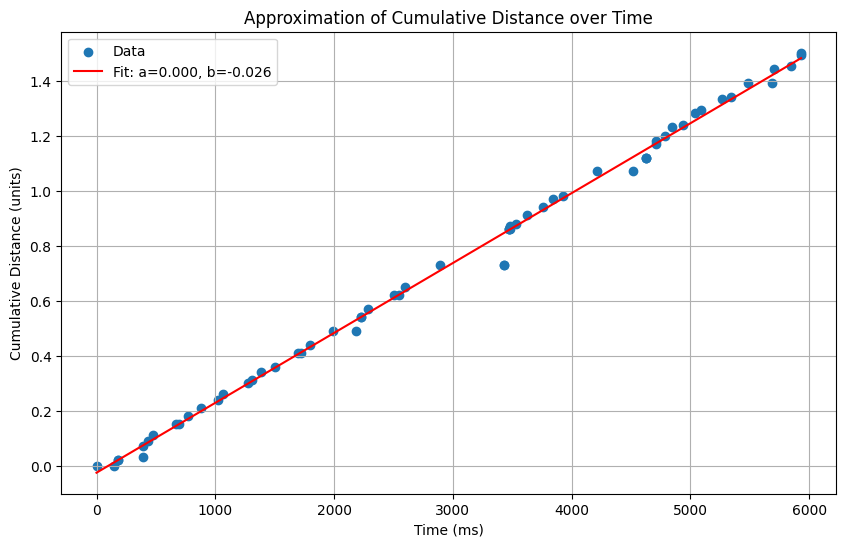

G(s) = 0.0002542188557242388/s


In [27]:
df = pd.read_csv('straight_drive.csv')

# Oblicz różnicę czasu od pierwszego timestampu w milisekundach
start_time = df['timestamp'][0]
df['time_ms'] = (df['timestamp'] - start_time) * 1000

# Oblicz zmiany współrzędnych x i y
dx = np.diff(df['x'], prepend=df['x'][0])
dy = np.diff(df['y'], prepend=df['y'][0])

# Oblicz odległości między kolejnymi punktami
distances = np.sqrt(dx**2 + dy**2)

# Upewnij się, że df['time_ms'] i distances mają tę samą długość
df['time_ms'] = df['time_ms'][:len(distances)]

# Oblicz całkowity przebyty dystans
cumulative_distance = np.cumsum(distances)

# Funkcja do dopasowania całkowitego przebytego dystansu
def model_cumulative_distance(t, a, b):
    return a * t + b

# Dopasowanie modelu do danych całkowitego przebytego dystansu
popt, pcov = np.polyfit(df['time_ms'], cumulative_distance, deg=1, cov=True)

# Generowanie wykresu
plt.figure(figsize=(10, 6))
plt.scatter(df['time_ms'], cumulative_distance, label='Data')
plt.plot(df['time_ms'], model_cumulative_distance(df['time_ms'], *popt), 'r-', label=f'Fit: a={popt[0]:.3f}, b={popt[1]:.3f}')
plt.xlabel('Time (ms)')
plt.ylabel('Cumulative Distance (units)')
plt.title('Approximation of Cumulative Distance over Time')
plt.legend()
plt.grid(True)
plt.show()

K = popt[0]
print(f"G(s) = {K}/s")

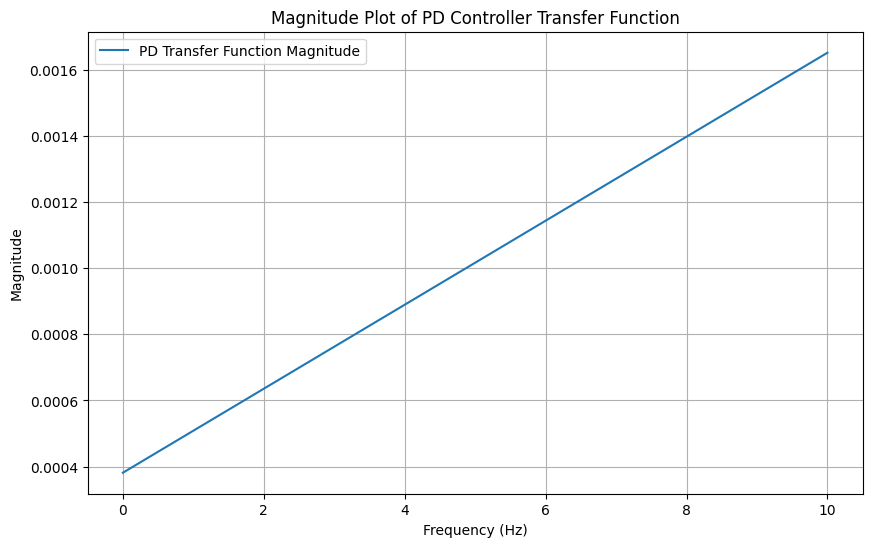

In [29]:
max_value = np.max(cumulative_distance)

Tu = 5.0  # Przykładowy czas oscylacji w punkcie krytycznym

# Wyznaczenie parametrów regulatora PD z metody Zieglera-Nicholsa
Ku = max_value  # Załóżmy, że Ku to maksymalna wartość odpowiedzi skokowej (punkt krytyczny)
Kp = 0.6 * Ku
Td = 0.5 * Tu

# Wydrukowanie parametrów regulatora PD
print(f"Parametry regulatora PD:")
print(f"Kp = {Kp}")
print(f"Td = {Td}")

In [21]:
df = pd.read_csv('turning.csv')

# Oblicz różnicę czasu od pierwszego timestampu w milisekundach
start_time = df['timestamp'][0]
df['time_ms'] = (df['timestamp'] - start_time) * 1000

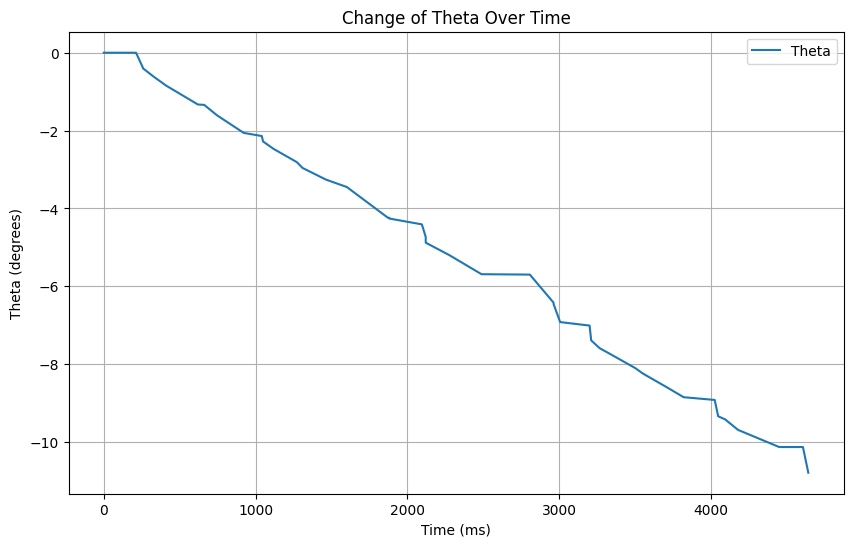

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['time_ms'], df['theta'], label='Theta')
plt.xlabel('Time (ms)')
plt.ylabel('Theta (degrees)')
plt.title('Change of Theta Over Time')
plt.legend()
plt.grid(True)
plt.show()
